In [1]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt
import upsetplot as usp

In [2]:
# load the config files and the variables from the upset_plot-section of the config file
config_path = ""
config_filename = "config_all_3files.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)

#var = "per_user_id"
var = "per_user_id_date"
root_data_dir_name = IO_json["root_data_dir_name"]
input = IO_json["upset_plot"]["input"][var]
dataset_labels = IO_json["upset_plot"]["dataset_labels"]
output = IO_json["upset_plot"]["output"][var]

cols = []
for ds in dataset_labels:
    cols.append(dataset_labels[ds])
print(cols)

['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS-Uploader)']


In [3]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
for i in range(3):
    df[cols[i]] = ~pd.isna(df[f"user_id_{i+1}"])

df1 = df[cols]


In [4]:

df2 = usp.from_indicators(df1)
print(df2)


OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS-Uploader)
True          False          False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                                                        ... 
False         False          True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
Name: ones, Length: 56962, dtype: float64


created image: /home/reinhold/Daten/OPEN/Duplicate_persons_data_per_user_id_date.png


<Figure size 1080x1080 with 0 Axes>

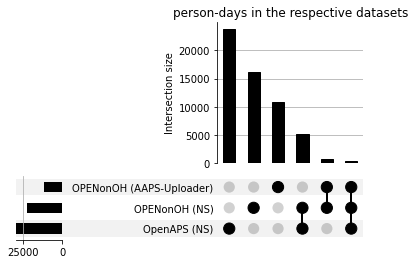

In [5]:
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.figure(figsize=(15,15))
plt.tight_layout()
usp.plot(df2, subset_size='count')
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")



In [6]:
# upset = usp.UpSet(df2, subset_size='count', intersection_plot_elements=3)
# upset.plot()
#upset.add_catplot(value='median_value', kind='strip', color='blue')
#upset.add_catplot(value='AGE', kind='strip', color='black')


In [27]:
# for venn3 diagramm
df_v1 = df2.groupby(cols, dropna=False).agg("count")
print(df_v1)
#print(type(df_v1))
#df_v1.info()


OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS-Uploader)
False         False          True                        10915
              True           False                       16137
                             True                          648
True          False          False                       23782
              True           False                        5115
                             True                          365
Name: ones, dtype: int64


(False, False, True) 10915
(False, True, False) 16137
(False, True, True) 648
(True, False, False) 23782
(True, True, False) 5115
(True, True, True) 365


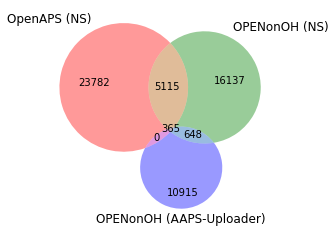

In [26]:
#print(df_v1.index)
#print(df_v1.index.names)

data = {}
for i in df_v1.index:
    print(i, df_v1.loc[i])
    i_str = "".join([str(int(i_k)) for i_k in i])
    data[i_str] = df_v1.loc[i]

plt.figure(figsize=(15,15))
plt.tight_layout()
venn3(subsets = data, set_labels=df_v1.index.names)
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")

#venn3(subsets = (data["100"], data["010"], data["110"], data["001"], data["101"], data["011"], data["111"]), set_labels=("OPENonOH", "OpenAPS_NS", "OPENonOH_AAPS_Uploader"), alpha=0.5)

In [13]:
df4 = df1[(df1[cols[0]]==True) & (df1[cols[1]]==True) & (df1[cols[2]]==True)]
print(df4)

       OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS-Uploader)
23528          True           True                      True
23529          True           True                      True
23530          True           True                      True
23531          True           True                      True
23532          True           True                      True
...             ...            ...                       ...
15653          True           True                      True
15654          True           True                      True
15656          True           True                      True
15657          True           True                      True
15658          True           True                      True

[365 rows x 3 columns]


In [23]:
x = (False, True, True)
int(x)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'